# Recognize hand-written digits by one-vs-all logistic regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random
from scipy.special import expit
from scipy import optimize

%matplotlib inline

In [3]:
datafile = 'data/ex3data1.mat'
data = scipy.io.loadmat(datafile)

In [4]:
data.keys()

dict_keys(['__version__', 'X', 'y', '__globals__', '__header__'])

In [5]:
X = data['X']
y = data['y']

In [6]:
X.shape

(5000, 400)

In [7]:
y.shape

(5000, 1)

In [8]:
X = np.c_[np.ones(X.shape[0]), X]

In [9]:
X.shape

(5000, 401)

In [10]:
def displayData(X):
    sample = np.random.choice(X.shape[0], 10)
    plt.imshow(X[sample,1:].reshape(200,-1).T)
    plt.axis('off')

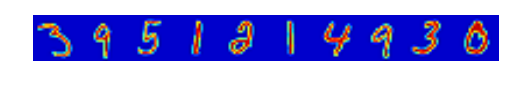

In [11]:
displayData(X)

In [12]:
def sigmoid(m):
    return expit(m)

In [13]:
def cost(theta, X, y, reg):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    return(J[0]) 

In [14]:
def gradient(theta, X, y, reg):
    m = y.size
    h = sigmoid(X.dot(theta).reshape(-1,1))
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return(grad.flatten())

In [15]:
k = 10 # the number of classes
theta_all = np.zeros([k, X.shape[1]])
for i in range(k):
    reg = 0
    if i==0:
        class_idx = 10
    else:
        class_idx = i
    theta = np.zeros([1, X.shape[1]])
    y_class = np.zeros(y.shape)
    for j in range(y.shape[0]):
        if y[j]==class_idx: y_class[j] = 1
    res = optimize.fmin_cg(cost, fprime=gradient, x0=theta, args=(X, y_class, reg), maxiter=50, disp=False, full_output=True)
    theta = res[0].reshape([1,-1])
    theta_all[i] = theta

In [16]:
prediction = sigmoid(X.dot(theta_all.T))

In [17]:
prediction = np.argsort(-prediction, axis=1)

In [18]:
prediction = prediction[:,0]

In [19]:
for i in range(y.shape[0]):
    if y[i]==10: y[i]=0

In [20]:
accuracy = sum(prediction==y.flatten())/y.shape[0]

In [21]:
accuracy

0.89159999999999995

The special function we use to minimize the cost function will affect the accuracy we finally achieve.